In [63]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Chaotic map Functions

In [64]:
def logistic(r, x):
    return r * x * (1 - x)
        
def sine(r,x):
    return r * math.sin(math.pi * x) / 4

def tent(r,x):
    if x<0.5:
        return r * x / 2
    else:
        return r * (1-x) /2

In [113]:
def cls(r,x):
    return ((r * x * (1 - x)) + ((4-r) * math.sin(math.pi * x) *0.25))%100

In [109]:
def clt(r,x):
    if x<0.5:
        return ((r*0.002*x*(1-x))+((r*x)/0.002))%1
    return ((r*0.002*x*(1-x))+((r*(1-x)/0.002)))%1

# Bifurcation diagram

In [70]:
def Bifurcation_diagram(func,x0,Npre,Nplot,steps=0.005,r_min=0):
    R=[]
    X=[]
    r_range=np.linspace(r_min,4,int(1/steps))
    for r in r_range:
        x=x0;
        for i in range(Npre+Nplot+1):
            if i>=Npre:
                X.append(x)
                R.append(r)
            x=func(r,x)
            #print(r)
    
    plt.plot(R,X,ls='',marker=',')
    plt.axis([r_min,4,0,1])
    plt.xlabel('r')
    plt.ylabel('x_n')
    plt.show()
    #return R,X
            
        

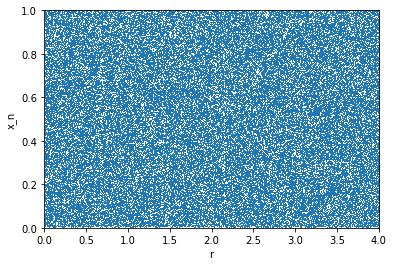

In [115]:
Bifurcation_diagram(clt,0.6,200,100,0.001)

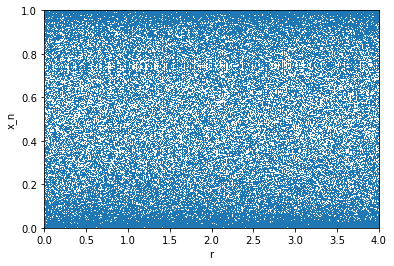

In [116]:
Bifurcation_diagram(cls,0.6,200,100,0.001)

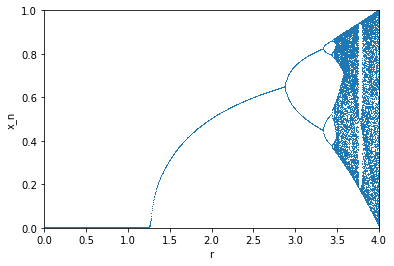

In [8]:
Bifurcation_diagram(sine,0.5,200,100,0.001)

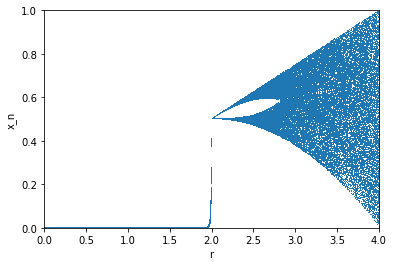

In [9]:
Bifurcation_diagram(tent,0.5,200,100,0.001)

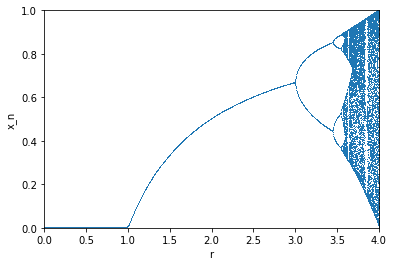

In [12]:
Bifurcation_diagram(logistic,0.5,200,100,0.001)

# Logistic map value

In [22]:
x0=0.5
r=3.99
X=[]
x=x0
X.append(x)
for i in range(65535):
    x=logistic(r,x)
    X.append(x)


In [23]:
print(len(X))

65536


# Input vector

In [15]:
import random

In [16]:
def inputKey(X):
    for i in range(64):
        X.append(random.randint(0, 1))
        
    return X


In [17]:
X=[]
X=inputKey(X)
print(X)

[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0]


In [18]:
print(len(X))

64


# Neural Network

In [117]:
import random
import numpy as np

In [118]:
def cubic(r, x):
    return r * x * (1 - (x*x))

def clsine(r,x):
        return ((r * x * (1 - x)) + ((4-r) * math.sin(math.pi * x) *0.25))%100
    
def clt(r,x):
    if x<0.5:
        return ((r*0.002*x*(1-x))+((r*x)/0.002))%1
    return ((r*0.002*x*(1-x))+((r*(1-x)/0.002)))%1

In [119]:
def inputKey(X):
    for i in range(64):
        X.append(random.randint(0, 1))
        
    return X

In [120]:
def Zo():
    S=[]
    for i in range(4):
        Si=""
        for i in range(16):
            x=random.randint(0, 1)
            Si+=str(x)
        
        S.append(int(Si,2))
        #print(Si)
        
    x=0
    for i in S:
        x+=(i/pow(2,16))
        
    return x%1

In [121]:
def activationFx(r,x,i):
    if(i&1):
        return clsine(r,x)
    return clt(r,x)

In [122]:
def Q_b(x):
    return (3.58+(0.42*x))

In [123]:
def Tb(x):
    return ((round(x*pow(10,4))%100)+1)

In [131]:
class Layer_Dense:
    
    def __init__(self,n_inputs,n_neurons):
        self.n_input=n_inputs
        self.n_neurons=n_neurons
        self.create_weights()
        self.create_biases()
        self.control_parameter()
    
    def create_weights(self):
        Nplot=self.n_input*self.n_neurons
        X=[]
        x=Zo()
        Npre=1000
        for i in range(Npre+Nplot):
            if i>=Npre:
                X.append(x)
            x=cubic(2.59,x)
        
        weights=np.array(X)
        self.weights=np.reshape(weights,(-1,self.n_neurons))
        self.biases=np.zeros((1,self.n_neurons))
        
    def create_biases(self):
        pass
    
    def control_parameter(self):
        pass
        
    def forward(self,inputs,Layer):
        XW=np.dot(inputs,self.weights)+self.biases
        Tb_Vector=Tb(inputs)
        self.output=activationFx(self.Q,XW,Layer)
        self.Q=Q_b(self.output)
        for i in Tb_Vector:
            for j in range(i):
                self.output=activationFx(self.Q,XW,Layer)
                self.Q=Q_b(self.output)
                
                
        

In [132]:
Hidden_layer1=Layer_Dense(64,32)
Hidden_layer2=Layer_Dense(32,16)
Hidden_layer3=Layer_Dense(16,8)
Output_layer=Layer_Dense(8,4)

In [2]:
import qrng

In [1]:
def generate_rn():
    qrng.set_provider_as_IBMQ('')
    qrng.set_backend()
    return qrng.get_random_float(0,1)

In [1]:
from PIL import Image
import tkinter as tk
from tkinter import filedialog
import hashlib 
import binascii
import textwrap
import cv2
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from importlib import reload  
from bisect import bisect_left as bsearch

In [2]:
# Lorenz paramters and initial conditions
a, b, c = 10, 2.667, 28
x0, y0, z0 = 0, 0, 0

#DNA-Encoding RULE #1 A = 00, T=01, G=10, C=11
dna={}
dna["00"]="A"
dna["01"]="T"
dna["10"]="G"
dna["11"]="C"
dna["A"]=[0,0]
dna["T"]=[0,1]
dna["G"]=[1,0]
dna["C"]=[1,1]
#DNA xor
dna["AA"]=dna["TT"]=dna["GG"]=dna["CC"]="A"
dna["AG"]=dna["GA"]=dna["TC"]=dna["CT"]="G"
dna["AC"]=dna["CA"]=dna["GT"]=dna["TG"]="C"
dna["AT"]=dna["TA"]=dna["CG"]=dna["GC"]="T"
# Maximum time point and total number of time points
tmax, N = 100, 10000

In [ ]:
def split_into_rgb_channels(image):
  red = image[:,:,2]
  green = image[:,:,1]
  blue = image[:,:,0]
  return red, green, blue

In [ ]:
def pixel_permutation(img):
    IrgbH=img.reshape(img.shape[0], (img.shape[1]*img.shape[2]))
    E1=[]
    for i in range(65536):
        x=generate_rn()
        E1.append(x)
    
    IrgbH=img.reshape(1,-1)
    
    

In [3]:
def lorenz(X, t, a, b, c):
    x, y, z = X
    x_dot = -a*(x - y)
    y_dot = c*x - y - x*z
    z_dot = -b*z + x*y
    return x_dot, y_dot, z_dot


In [4]:
def image_selector():                           #returns path to selected image
    path = "NULL"
    root = tk.Tk()
    root.withdraw()                             # we don't want a full GUI, so keep the root window from appearing
    path = filedialog.askopenfilename()         # show an "Open" dialog box and return the path to the selected file
    if path!="NULL":
        print("Image loaded!") 
    else:
        print("Error Image not loaded!")
    return path

In [6]:
#Secure key generation
def securekey (iname):
    img = Image.open(iname)
    m, n = img.size
    print("pixels: {0}  width: {2} height: {1} ".format(m*n, m, n))
    pix = img.load()          
    plainimage = list()                         #_plainimage contains all the rgb values continuously
    for y in range(n):
        for x in range(m):
            for k in range(0,3):
                plainimage.append(pix[x,y][k])    
    key = hashlib.sha256()                      #key is made a hash.sha256 object  
    key.update(bytearray(plainimage))          #image data is fed to generate digest
    return key.hexdigest() ,m ,n

In [7]:
def update_lorentz (key):
    key_bin = bin(int(key, 16))[2:].zfill(256)  #covert hex key digest to binary
    k={}                                        #key dictionary
    key_32_parts=textwrap.wrap(key_bin, 8)      #slicing key into 8 parts
    num=1
    for i in key_32_parts:
        k["k{0}".format(num)]=i
        num = num + 1
    t1 = t2 = t3 = 0
    for i in range (1,12):
        t1=t1^int(k["k{0}".format(i)],2)
    for i in range (12,23):
        t2=t2^int(k["k{0}".format(i)],2)
    for i in range (23,33):
        t3=t3^int(k["k{0}".format(i)],2)   
    global x0 ,y0, z0
    x0=x0 + t1/256            
    y0=y0 + t2/256            
    z0=z0 + t3/256 

In [8]:
def decompose_matrix(iname):
    image = cv2.imread(iname)
    blue,green,red = split_into_rgb_channels(image)
    for values, channel in zip((red, green, blue), (2,1,0)):
        img = np.zeros((values.shape[0], values.shape[1]), dtype = np.uint8)
        img[:,:] = (values)
        if channel == 0:
            B = np.asmatrix(img)
        elif channel == 1:
            G = np.asmatrix(img)
        else:
            R = np.asmatrix(img)
    return B,G,R

In [9]:
def dna_encode(b,g,r):
    
    b = np.unpackbits(b,axis=1)
    g = np.unpackbits(g,axis=1)
    r = np.unpackbits(r,axis=1)
    m,n = b.shape
    r_enc= np.chararray((m,int(n/2)))
    g_enc= np.chararray((m,int(n/2)))
    b_enc= np.chararray((m,int(n/2)))
    
    for color,enc in zip((b,g,r),(b_enc,g_enc,r_enc)):
        idx=0
        for j in range(0,m):
            for i in range(0,n,2):
                enc[j,idx]=dna["{0}{1}".format(color[j,i],color[j,i+1])]
                idx+=1
                if (i==n-2):
                    idx=0
                    break
    
    b_enc=b_enc.astype(str)
    g_enc=g_enc.astype(str)
    r_enc=r_enc.astype(str)
    return b_enc,g_enc,r_enc

In [10]:
def key_matrix_encode(key,b):    
    #encoded key matrix
    b = np.unpackbits(b,axis=1)
    m,n = b.shape
    key_bin = bin(int(key, 16))[2:].zfill(256)
    Mk = np.zeros((m,n),dtype=np.uint8)
    x=0
    for j in range(0,m):
            for i in range(0,n):
                Mk[j,i]=key_bin[x%256]
                x+=1
    
    Mk_enc=np.chararray((m,int(n/2)))
    idx=0
    for j in range(0,m):
        for i in range(0,n,2):
            if idx==(n/2):
                idx=0
            Mk_enc[j,idx]=dna["{0}{1}".format(Mk[j,i],Mk[j,i+1])]
            idx+=1
    Mk_enc=Mk_enc.astype(str)
    return Mk_enc

In [11]:
def xor_operation(b,g,r,mk):
    m,n = b.shape
    bx=np.chararray((m,n))
    gx=np.chararray((m,n))
    rx=np.chararray((m,n))
    b=b.astype(str)
    g=g.astype(str)
    r=r.astype(str)
    for i in range(0,m):
        for j in range (0,n):
            bx[i,j] = dna["{0}{1}".format(b[i,j],mk[i,j])]
            gx[i,j] = dna["{0}{1}".format(g[i,j],mk[i,j])]
            rx[i,j] = dna["{0}{1}".format(r[i,j],mk[i,j])]
         
    bx=bx.astype(str)
    gx=gx.astype(str)
    rx=rx.astype(str)
    return bx,gx,rx 

In [12]:
def gen_chaos_seq(m,n):
    global x0,y0,z0,a,b,c,N
    N=m*n*4
    x= np.array((m,n*4))
    y= np.array((m,n*4))
    z= np.array((m,n*4))
    t = np.linspace(0, tmax, N)
    f = odeint(lorenz, (x0, y0, z0), t, args=(a, b, c))
    x, y, z = f.T
    x=x[:(N)]
    y=y[:(N)]
    z=z[:(N)]
    return x,y,z

In [13]:

def plot(x,y,z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    s = 100
    c = np.linspace(0,1,N)
    for i in range(0,N-s,s):
        ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1-c[i],c[i],1), alpha=0.4)
    ax.set_axis_off()
    plt.show()

In [14]:
def sequence_indexing(x,y,z):
    n=len(x)
    fx=np.zeros((n),dtype=np.uint32)
    fy=np.zeros((n),dtype=np.uint32)
    fz=np.zeros((n),dtype=np.uint32)
    seq=sorted(x)
    for k1 in range(0,n):
            t = x[k1]
            k2 = bsearch(seq, t)
            fx[k1]=k2
    seq=sorted(y)
    for k1 in range(0,n):
            t = y[k1]
            k2 = bsearch(seq, t)
            fy[k1]=k2
    seq=sorted(z)
    for k1 in range(0,n):
            t = z[k1]
            k2 = bsearch(seq, t)
            fz[k1]=k2
    return fx,fy,fz

In [15]:
def scramble(fx,fy,fz,b,r,g):
    p,q=b.shape
    size = p*q
    bx=b.reshape(size).astype(str)
    gx=g.reshape(size).astype(str)
    rx=r.reshape(size).astype(str)
    bx_s=np.chararray((size))
    gx_s=np.chararray((size))
    rx_s=np.chararray((size))

    for i in range(size):
            idx = fz[i]
            bx_s[i] = bx[idx]
    for i in range(size):
            idx = fy[i]
            gx_s[i] = gx[idx]
    for i in range(size):
            idx = fx[i]
            rx_s[i] = rx[idx]     
    bx_s=bx_s.astype(str)
    gx_s=gx_s.astype(str)
    rx_s=rx_s.astype(str)
    
    b_s=np.chararray((p,q))
    g_s=np.chararray((p,q))
    r_s=np.chararray((p,q))

    b_s=bx_s.reshape(p,q)
    g_s=gx_s.reshape(p,q)
    r_s=rx_s.reshape(p,q)
    return b_s,g_s,r_s

In [16]:
def scramble_new(fx,fy,fz,b,g,r):
    p,q=b.shape
    size = p*q
    bx=b.reshape(size)
    gx=g.reshape(size)
    rx=r.reshape(size)

    bx_s=b.reshape(size)
    gx_s=g.reshape(size)
    rx_s=r.reshape(size)
    
    bx=bx.astype(str)
    gx=gx.astype(str)
    rx=rx.astype(str)
    bx_s=bx_s.astype(str)
    gx_s=gx_s.astype(str)
    rx_s=rx_s.astype(str)
    
    for i in range(size):
            idx = fz[i]
            bx_s[idx] = bx[i]
    for i in range(size):
            idx = fy[i]
            gx_s[idx] = gx[i]
    for i in range(size):
            idx = fx[i]
            rx_s[idx] = rx[i]    

    b_s=np.chararray((p,q))
    g_s=np.chararray((p,q))
    r_s=np.chararray((p,q))

    b_s=bx_s.reshape(p,q)
    g_s=gx_s.reshape(p,q)
    r_s=rx_s.reshape(p,q)

    return b_s,g_s,r_s

In [17]:
def dna_decode(b,g,r):
    m,n = b.shape
    r_dec= np.ndarray((m,int(n*2)),dtype=np.uint8)
    g_dec= np.ndarray((m,int(n*2)),dtype=np.uint8)
    b_dec= np.ndarray((m,int(n*2)),dtype=np.uint8)
    for color,dec in zip((b,g,r),(b_dec,g_dec,r_dec)):
        for j in range(0,m):
            for i in range(0,n):
                dec[j,2*i]=dna["{0}".format(color[j,i])][0]
                dec[j,2*i+1]=dna["{0}".format(color[j,i])][1]
    b_dec=(np.packbits(b_dec,axis=-1))
    g_dec=(np.packbits(g_dec,axis=-1))
    r_dec=(np.packbits(r_dec,axis=-1))
    return b_dec,g_dec,r_dec

In [18]:
def xor_operation_new(b,g,r,mk):
    m,n = b.shape
    bx=np.chararray((m,n))
    gx=np.chararray((m,n))
    rx=np.chararray((m,n))
    b=b.astype(str)
    g=g.astype(str)
    r=r.astype(str)
    for i in range(0,m):
        for j in range (0,n):
            bx[i,j] = dna["{0}{1}".format(b[i,j],mk[i,j])]
            gx[i,j] = dna["{0}{1}".format(g[i,j],mk[i,j])]
            rx[i,j] = dna["{0}{1}".format(r[i,j],mk[i,j])]
         
    bx=bx.astype(str)
    gx=gx.astype(str)
    rx=rx.astype(str)
    return bx,gx,rx 

In [19]:
def recover_image(b,g,r,iname):
    img = cv2.imread(iname)
    img[:,:,2] = r
    img[:,:,1] = g
    img[:,:,0] = b
    cv2.imwrite(("enc.jpg"), img)
    print("saved ecrypted image as enc.jpg")
    return img

In [20]:
def decrypt(image,fx,fy,fz,fp,Mk,bt,gt,rt):
    r,g,b=split_into_rgb_channels(image)
    p,q = rt.shape
    benc,genc,renc=dna_encode(b,g,r)
    bs,gs,rs=scramble_new(fx,fy,fz,benc,genc,renc)
    bx,rx,gx=xor_operation_new(bs,gs,rs,Mk)
    blue,green,red=dna_decode(bx,gx,rx)
    green,red = red, green
    img=np.zeros((p,q,3),dtype=np.uint8)
    img[:,:,0] = red
    img[:,:,1] = green
    img[:,:,2] = blue
    cv2.imwrite(("Recovered.jpg"), img)

In [21]:
if (__name__ == "__main__"):
    file_path = image_selector()
    print(file_path)
    key,m,n = securekey(file_path)
    update_lorentz(key)
    blue,green,red=decompose_matrix(file_path)
    blue_e,green_e,red_e=dna_encode(blue,green,red)
    Mk_e = key_matrix_encode(key,blue)
    blue_final, green_final, red_final = xor_operation(blue_e,green_e,red_e,Mk_e)
    x,y,z=gen_chaos_seq(m,n)
    fx,fy,fz=sequence_indexing(x,y,z)
    blue_scrambled,green_scrambled,red_scrambled = scramble(fx,fy,fz,blue_final,red_final,green_final)
    b,g,r=dna_decode(blue_scrambled,green_scrambled,red_scrambled)
    img=recover_image(b,g,r,file_path)

    print("decrypting...")
    decrypt(img,fx,fy,fz,file_path,Mk_e,blue,green,red)

Image loaded!
/Users/divyanshusharma/VIT/Capstone/image-Encryption-dna-encoding-master/images/4.1.04.tiff
pixels: 65536  width: 256 height: 256 
saved ecrypted image as enc.jpg
decrypting...
